# Búsqueda de estructuras en “datos puntuales”

## Ejercicio

- Generar una distribución de puntos aleatoria en una caja de lado L.
- Calcular la funciónd de correlación y verificar que en el cubo generado, ésta es cero.
- Que el programe funcione en 2 y 3 dimensiones.
- Usar el código para calcular 2PCF en el conjunto de datos que nos proporcionará
- ¿Cómo haría más eficiente el cálculo?

### Inicialización

In [1]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import math
from IPython.display import clear_output

### Códigos de cálculos

#### Generar una distribución de puntos aleatorios en un cubo de lado L

In [2]:
def generateCubeRandom(L=1, seed= False, numeroPuntos=5, dimensiones=3):
    '''
    Descripción: Función que genera puntos aleatorios dentro de un cubo.
    IN = {
        L: El tamaño de los lados del cubo
        seed: Una seed para tener datos consistentes, si es False entonces es 100% random
        numeroPuntos: El número de puntos que queremos generar
    }
    OUT: Una lista de puntos aleatorios dentro del cubo de lado L
    '''
    if seed:
        np.random.seed(seed)
    if dimensiones==3:
        puntos=[[np.random.uniform(0, L),np.random.uniform(0, L),np.random.uniform(0, L)] for punto in range(numeroPuntos)]
    else:
        puntos=[[np.random.uniform(0, L),np.random.uniform(0, L),0] for punto in range(numeroPuntos)]
 
    return puntos

#### Función de correlación

In [3]:
def distanciasPuntos(datos1, bins, datos2=[]):
    '''
    Descripción: Calcula las distancias entre todos los puntos de dos arreglos por pares y los acomoda en un histograma.
    IN ={
            datos1 y datos2: Los datos a manejar. 
            bins: Una lista con los bins de nuestro histograma.
        }
    OUT: Una lista con la frecuencia de distancias que se encuentran en los rangos de bins.
    '''
    # Transformamos a numpy arreglos para mayor facilidad
    datos1 = np.array(datos1)
    # Checamos si datos2 está vacío
    if datos2 == []:
        datos2 = datos1
    # Creamos un histograma vacío.
    histograma = np.histogram(np.zeros(shape=len(datos1)),bins=bins)[0]
    # Recorremos punto por punto, sólo hay que recorrer esto una cantidad "datos" veces gracias a numpy
    for dato in datos1:
        aux=np.sum(np.square(datos2 - dato), axis = 1)**(1/2)
        #aux = list(filter(lambda x: x != 0, np.sum(np.square(datos - index), axis = 1)**(1/2)))
        
        # Vamos creando nuestro histograma
        histograma += np.histogram(aux, bins=bins)[0]
    
    # Regresamos nuestro histograma, recordando que tenemos que dividir los valores entre dos porque se repiten.
    return histograma

In [4]:
def funcionCorrelacion(datos, datosRandom, bins, L):
    '''
    Descripción: Calcula la función de correlación entre dos distribuciones
    IN = {
        NOTA: Los elementos deberán ser listas, no numpy arrays.
        datos: Lista de datos en 2 o 3 dimensiones.
        randomDistribution: Lista de puntos en la distribución aleatoria que queremos comparar.
        bins: Cuántas distancias queremos comparar.
        L: El tamaño de nuestro cubo aleatorio
    }
    OUT: Una lista, el primer item en la lista es apoyo para graficar y el segundo item es
    el valor de la función de correlación en los puntos bins.
    '''
    # Creamos el arreglo de puntos en conjunto.
    datosJuntos = datos + datosRandom
    # Calculamos el número de puntos que hay en los datos y en nuestra distribución aleatoria.
    numeroPuntosDatos = len(datos)
    numeroPuntosRandom = len(datosRandom)
    numeroPuntosJuntos = len(datosJuntos)
    # Calculamos el número de pares de datos que hay en los datos y en la distribución random, luego en un conjunto de ellos
    f = math.factorial
    numeroParesDatos = f(numeroPuntosDatos)/(2*f(numeroPuntosDatos - 2))
    numeroParesRandom = f(numeroPuntosRandom)/(2*f(numeroPuntosRandom - 2))
    numeroParesJuntos = numeroPuntosDatos*numeroPuntosRandom
    # Calculamos la separación que debe haber entre cada bin.
    separacionBins = [(Bin)*L/bins for Bin in range(bins+1)]
    
    # Ahora, calcularemos la distancia de cada uno de los puntos en datos, randomDistribution y en ambos en conjunto
    # Y las normalizamos
    DD = distanciasPuntos(datos1=datos, bins=separacionBins) / numeroParesDatos / 2
    RR = distanciasPuntos(datos1=datosRandom, bins=separacionBins) / numeroParesRandom / 2
    DR = distanciasPuntos(datos1=datos, datos2=datosRandom, bins=separacionBins) / numeroParesJuntos
    # Este es el valor de la función de correlación
    correlacion = (DD - 2*DR + RR)/RR
    # Creamos nuestras distancias, siendo estas las medias de cada intervalo en nuestros histogramas
    r = [(Bin+1)*(L/bins) + L/(2*bins) for Bin in range(bins)]
    
    return [r,correlacion]
    

### Códgios de visualización

#### Graficar el cubo

In [5]:
def graphCube(puntos, color="purple"):
    '''
    Descripción: Función que grafica puntos en 3D.
    IN = {
        coord: Una lista con coordenas [x,y,z], que a su vez, cada variable son una lista
        color: Inidica el color de nuestra gráfica
    }
    OUT: Gráfica 3d de los puntos
    '''
    # Transformaremos los puntos de manera más amigable para la función de abajo:
    x=[punto[0] for punto in puntos]
    y=[punto[1] for punto in puntos]
    z=[punto[2] for punto in puntos]

    # Ahora sí, esta parte grafica pero no sé exactamente qué hace xddd
    fig = plt.figure(figsize = (7,7)) # Define el tamaño de nuestra gráfica
    ax1 = fig.add_subplot(projection='3d') # Aparentemente le decimos que es el 3D
    ax1.scatter(x, y, z, "r", marker='.', color=color) # Pintamos cada punto en su respectiva posición

#### Graficar x,y normal

In [6]:
def graphFunction(x,y, color=["purple","blue"], labels=["x","y"], titulo="", scatter=False, corte=[0,-1], limite=[]):
    '''
    Descripción: Función que grafica y con respecto a x
    IN = {
        x: Variable independiente.
        y: Variable dependiente.
        color: El color de la gráfica.
        labels: El nombre de las variables.
        titulo: El título
        scatter: Si es que se quieren resaltar los puntos
    }
    Out: Una bonita gráfica x-y
    '''
    # Creamos el objeto figura y nuestro ax.
    fig, ax = plt.subplots(figsize = (10, 7))
    # ponemos título
    ax.set_title(titulo)
    # Graficamos
    if scatter:
        ax.scatter(x[corte[0]:corte[1]],y[corte[0]:corte[1]], marker='.', c=color[0])
    ax.plot(x[corte[0]:corte[1]], y[corte[0]:corte[1]], color=color[1]) # Graficamos
    ax.set_xlabel(labels[0]) # Asignamos nombres a los labels
    ax.set_ylabel(labels[1]) # Asignamos nombres a los labels
    if limite != []:
        plt.ylim(top = max(limite), bottom= min(limite))
    ax.grid() # Con cuadrícula

#### Graficar en 2-D

In [7]:
def graph2D(x,y):
    """
    Descripción: Función que grafica en 2D
    IN = {
        x: Puntos en el eje x
        y: Puntos en el eje y
    }
    OUT: Una bonita gráfica en 2D
    """
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x, y, alpha = 0.08, marker = '.', color = 'blue')
    ax1.set_title('Proyección 2D de los datos')
    plt.show()

### Ejecutando el código

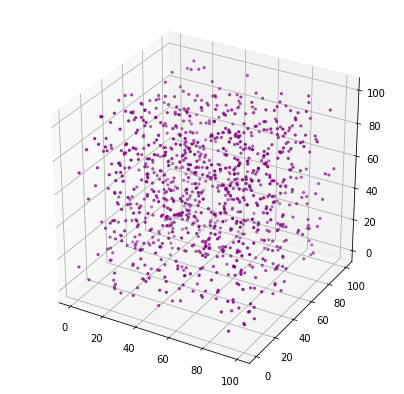

In [8]:
cube1=generateCubeRandom(L=100, numeroPuntos=1000)
graphCube(puntos=cube1, color="purple")

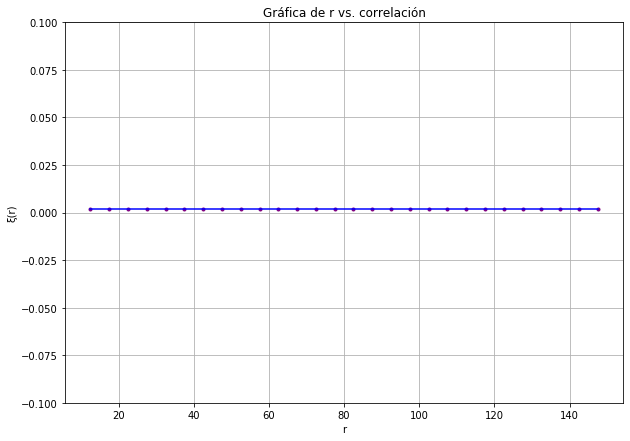

In [63]:
aux=funcionCorrelacion(datos=cube1, datosRandom=cube1, L=150, bins=30)
r = aux[0]
xi = aux[1]
graphFunction(x=r,y=xi, titulo="Gráfica de r vs. correlación", labels=["r", "ξ(r)"], scatter=True, corte=[1,-1], limite=[-0.1, 0.1])

### Graficamos r^2*ξ(r)

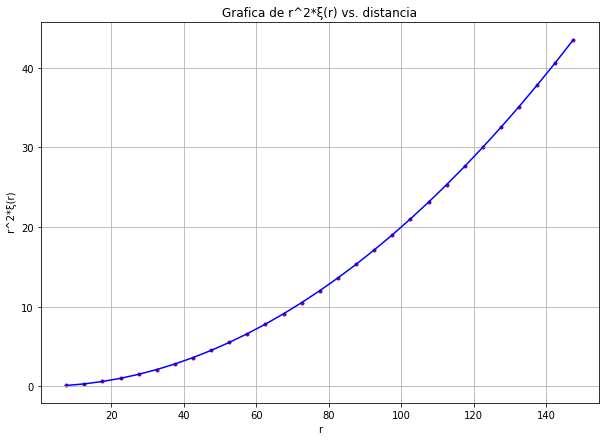

In [66]:
r2xi=np.array(r)**2 * np.array(xi)
graphFunction(x=r,y=r2xi,titulo="Grafica de r^2*ξ(r) vs. distancia", labels=["r"," r^2*ξ(r)"], scatter=True)

## Distintos cubos aleatorios

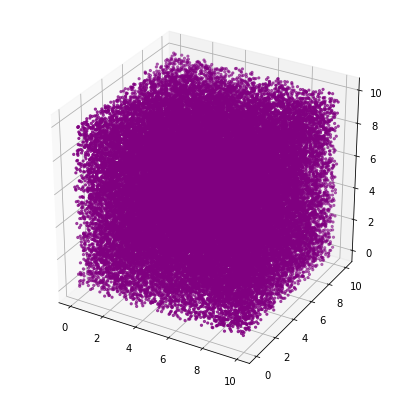

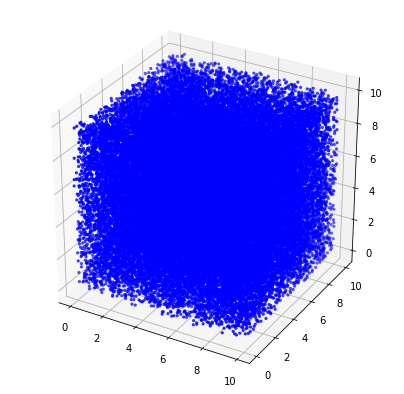

In [67]:
cuboGordo1 = generateCubeRandom(L=10, numeroPuntos=50000)
cuboGordo2 = generateCubeRandom(L=10, numeroPuntos=50000)
graphCube(cuboGordo1)
graphCube(cuboGordo2, color="blue")

In [68]:
auxGorda=funcionCorrelacion(datos=cuboGordo1, datosRandom=cuboGordo2, L=15, bins=100)
rGorda = auxGorda[0]
xiGorda = auxGorda[1]

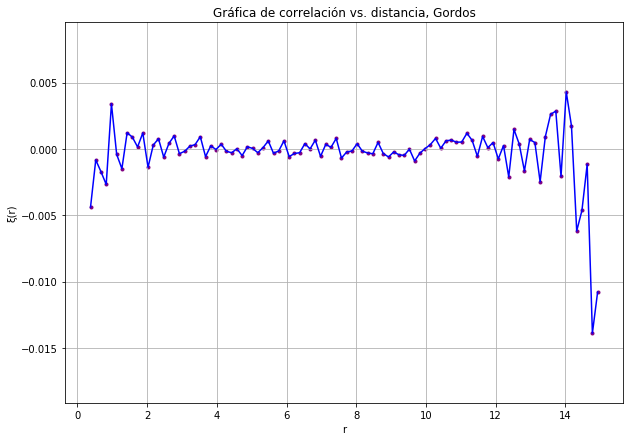

In [69]:
graphFunction(x=rGorda,y=xiGorda,titulo="Gráfica de correlación vs. distancia, Gordos", labels=["r","ξ(r)"], scatter=True, corte=[1,-1])

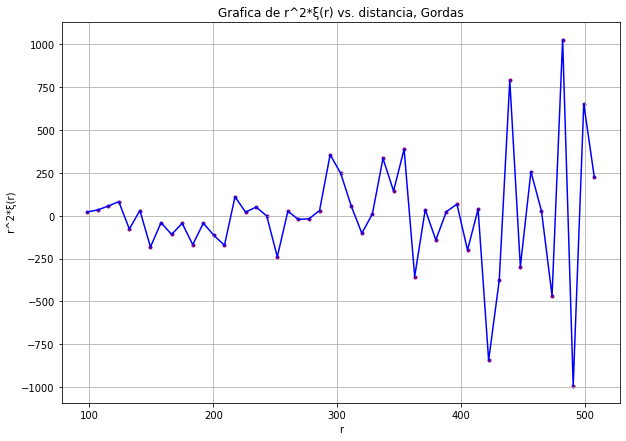

In [40]:
# Graficamos r**2*xi
r2xiGordos=np.array(rGorda)**2 * np.array(xiGorda)
graphFunction(x=rGorda,y=r2xiGordos,titulo="Grafica de r^2*ξ(r) vs. distancia, Gordas", labels=["r"," r^2*ξ(r)"], scatter=True, corte=[10,-1])

# Datos de prueba 10k 

In [17]:
# A continuación cargaremos los datos de prueba
data10k = np.load('prueba_10k.npy')

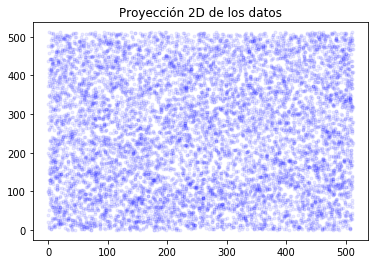

In [39]:
# Graficamos los puntos para visualizar estructuras
graph2D(data10k.T[0], data10k.T[1])

In [22]:
# Generando nuestro cubo aleatorio
cube10k = generateCubeRandom(numeroPuntos=10000, L=512)

In [24]:
# Calculamos la función de correlación
aux10k = funcionCorrelacion(datos=data10k, datosRandom=cube10k, L=512, bins=60)
r10k = aux10k[0]
xi10k = aux10k[1]

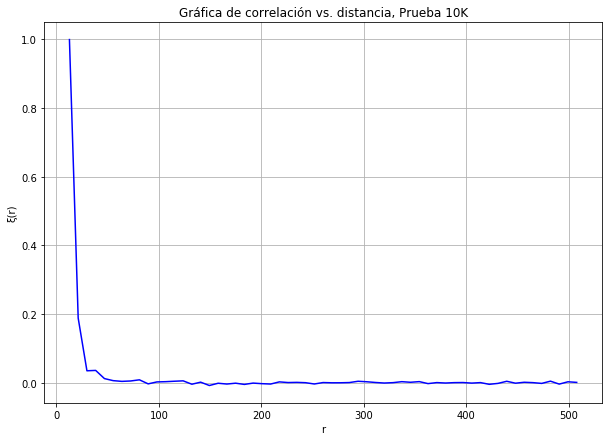

In [43]:
# Graficamos nuestra función
graphFunction(x=r10k,y=xi10k,titulo="Gráfica de correlación vs. distancia, Prueba 10K", labels=["r","ξ(r)"])

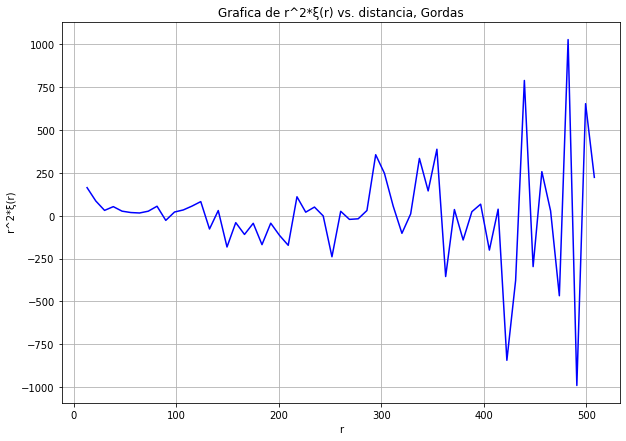

In [44]:
# Graficamos r**2*xi
r2xi10k=np.array(r10k)**2 * np.array(xi10k)
graphFunction(x=r10k,y=r2xi10k,titulo="Grafica de r^2*ξ(r) vs. distancia, Gordas", labels=["r"," r^2*ξ(r)"])

# Datos de prueba 20k

In [51]:
# A continuación cargaremos los datos de prueba
data20k = np.load('prueba_20k.npy')

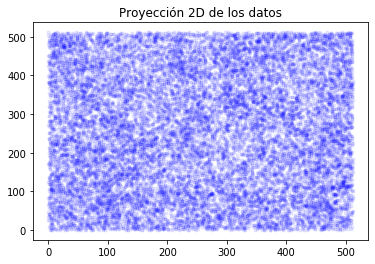

In [52]:
# Graficamos los puntos para visualizar estructuras
graph2D(data20k.T[0], data20k.T[1])

In [53]:
# Generando nuestro cubo aleatorio
cube20k = generateCubeRandom(numeroPuntos=20000, L=512)

In [54]:
# Calculamos la función de correlación
aux20k = funcionCorrelacion(datos=data20k, datosRandom=cube20k, L=512, bins=60)
r20k = aux20k[0]
xi20k = aux20k[1]

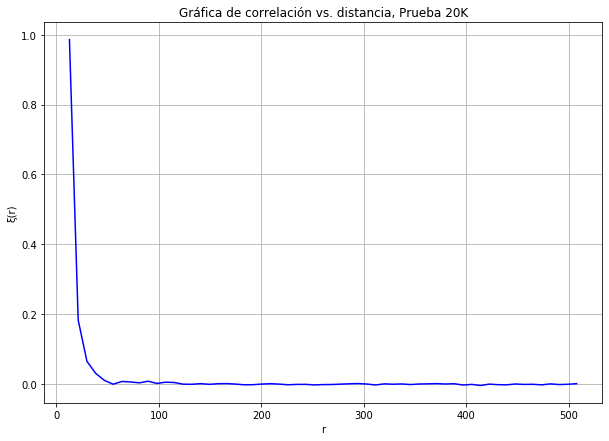

In [55]:
# Graficamos nuestra función
graphFunction(x=r20k,y=xi20k,titulo="Gráfica de correlación vs. distancia, Prueba 20K", labels=["r","ξ(r)"])

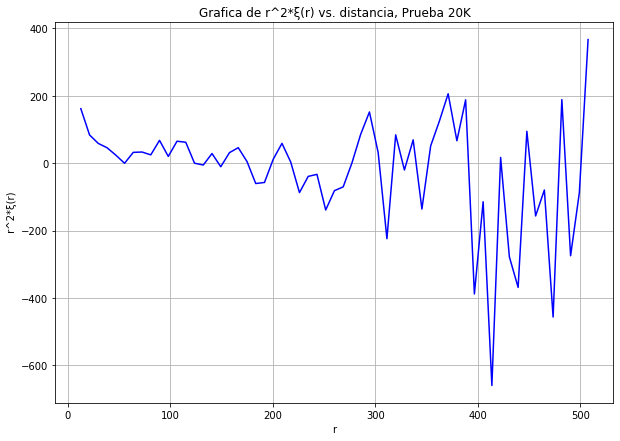

In [56]:
# Graficamos r**2*xi
r2xi20k=np.array(r20k)**2 * np.array(xi20k)
graphFunction(x=r20k,y=r2xi20k,titulo="Grafica de r^2*ξ(r) vs. distancia, Prueba 20K", labels=["r"," r^2*ξ(r)"])

# Datos de prueba 50k

In [57]:
# A continuación cargaremos los datos de prueba
data50k = np.load('prueba_50k.npy')

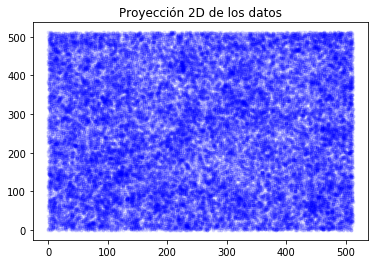

In [58]:
# Graficamos los puntos para visualizar estructuras
graph2D(data50k.T[0], data50k.T[1])

In [62]:
# Generando nuestro cubo aleatorio
cube50k = generateCubeRandom(numeroPuntos=50000, L=512)

In [63]:
# Calculamos la función de correlación
aux50k = funcionCorrelacion(datos=data50k, datosRandom=cube50k, L=512, bins=60)
r50k = aux50k[0]
xi50k = aux50k[1]

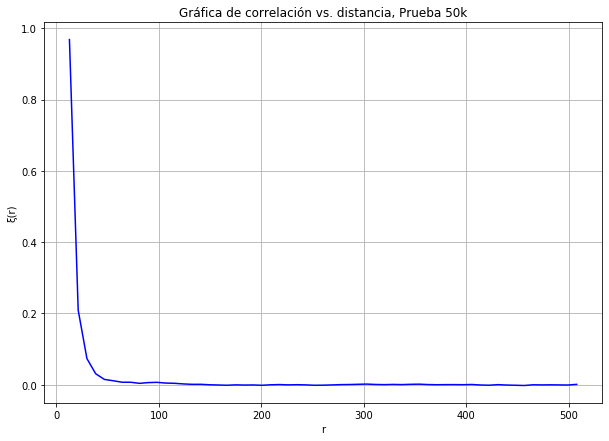

In [64]:
# Graficamos nuestra función
graphFunction(x=r50k,y=xi50k,titulo="Gráfica de correlación vs. distancia, Prueba 50k", labels=["r","ξ(r)"])

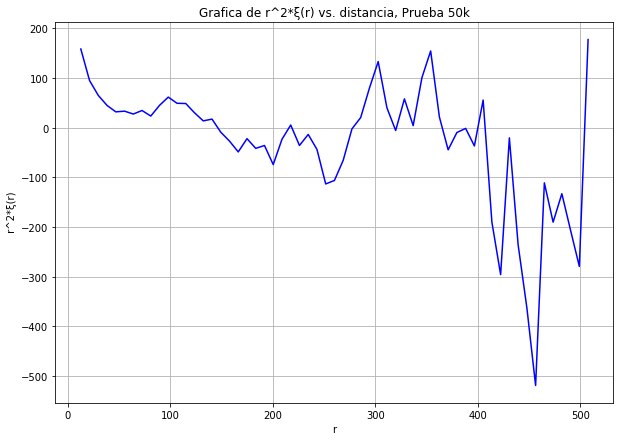

In [65]:
# Graficamos r**2*xi
r2xi50k=np.array(r50k)**2 * np.array(xi50k)
graphFunction(x=r50k,y=r2xi50k,titulo="Grafica de r^2*ξ(r) vs. distancia, Prueba 50k", labels=["r"," r^2*ξ(r)"])

# Datos de prueba 250k

In [8]:
# A continuación cargaremos los datos de prueba
data250k = np.load('prueba_250k.npy')

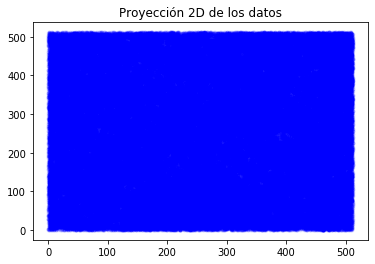

In [9]:
# Graficamos los puntos para visualizar estructuras
graph2D(data250k.T[0], data250k.T[1])

In [10]:
# Generando nuestro cubo aleatorio
cube250k = generateCubeRandom(numeroPuntos=250000, L=512)

In [11]:
# Calculamos la función de correlación
aux250k = funcionCorrelacion(datos=data250k, datosRandom=cube250k, L=512, bins=60)
r250k = aux250k[0]
xi250k = aux250k[1]

KeyboardInterrupt: 

In [ ]:
# Graficamos nuestra función
graphFunction(x=r250k,y=xi250k,titulo="Gráfica de correlación vs. distancia, Prueba 250k", labels=["r","ξ(r)"])

In [ ]:
# Graficamos r**2*xi
r2xi250k=np.array(r250k)**2 * np.array(xi250k)
graphFunction(x=r250k,y=r2xi250k,titulo="Grafica de r^2*ξ(r) vs. distancia, Prueba 250k", labels=["r"," r^2*ξ(r)"])